In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

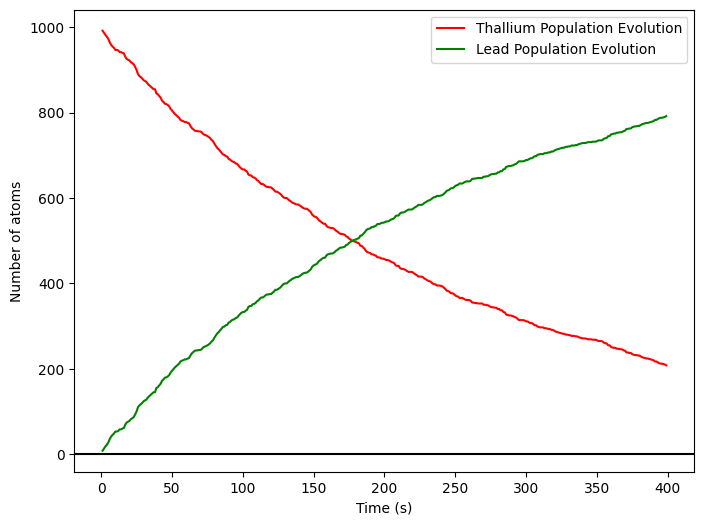

In [19]:
tau = 3.052 * 60
N_Tl = 1000
N_Pb = 0
Time = []
Thallium = []
Lead = []

p_step = 1 - 2**(-1/tau)

for i in range(1, 400):
    decays = np.random.random(N_Tl) < p_step
    number_of_decayed_atoms = np.sum(decays)
    N_Tl = N_Tl - number_of_decayed_atoms
    N_Pb = N_Pb + number_of_decayed_atoms
    if N_Pb > 1000:
        break
    Time.append(i)
    Thallium.append(N_Tl)
    Lead.append(N_Pb)

plt.figure(figsize=(8,6))
plt.plot(Time, Thallium, color='r', label='Thallium Population Evolution')
plt.plot(Time, Lead, color='g', label='Lead Population Evolution')
plt.axhline(0, color='black')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend(loc='best')
plt.show()

In [ ]:
def p_pdf(t):
    return (2**(-t/tau)) * (np.log(2)/tau)

def p_cdf(t):
    return 1 - 2**(-t/tau)

def t(z):
    return -tau*np.log2(1-z)

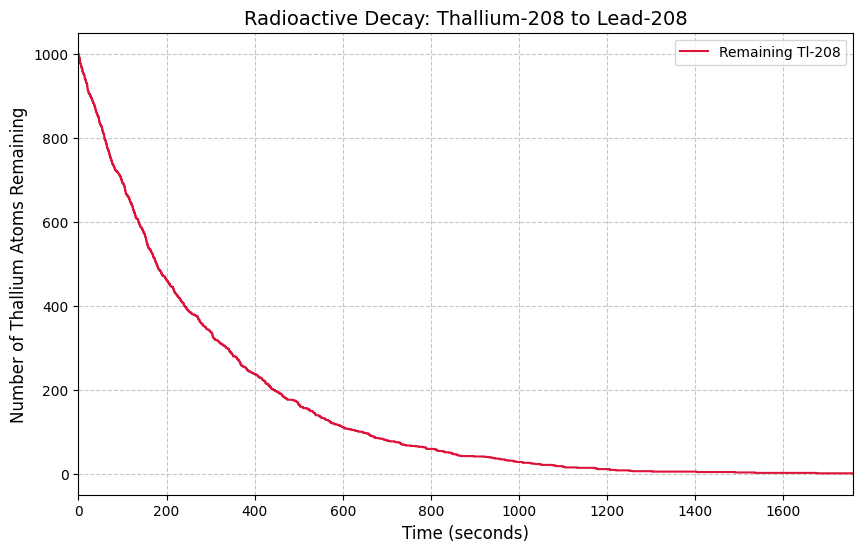

In [27]:
z = np.random.random(1000)
all_decay_times = t(z)

Time_inverse = []
Thallium_inverse = []

for i in range(1, 1000): 
    # An atom is still Thallium if its decay time is in the future (> i)
    still_alive = np.sum(all_decay_times > i)
    
    Time_inverse.append(i)
    Thallium_inverse.append(still_alive)
    
    if still_alive == 0:
        break

sorted_times = np.sort(all_decay_times)
remaining_atoms = np.arange(1000, 0, -1)

plt.figure(figsize=(10, 6))

plt.step(sorted_times, remaining_atoms, where='post', color='crimson', label='Remaining Tl-208')

plt.title('Radioactive Decay: Thallium-208 to Lead-208', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Number of Thallium Atoms Remaining', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, max(sorted_times))
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [ ]:
e = 1.60217663e-19
epsilon_0 = 8.85418782e-12
a0 = 5.29177211e-11
Z = 79
E = 7.7e6 * e

sigma = a0 / 100
n_particles = 1000000

x = np.random.normal(0, sigma, n_particles)
y = np.random.normal(0, sigma, n_particles)
b = np.sqrt((x**2) + (y**2))

theta = 2 * np.arctan(Z * (e**2) / (2 * np.pi * epsilon_0 * E * b))

bounce = theta > np.pi/2 
bounce_number = np.sum(bounce)

#Another way of doing it is knowing that:
# When theta = pi/2, then theta/2 = pi/4. Since tan(pi/4) = 1, the condition simplifies beautifully:
# If b < k, then theta > pi/2 (the particle bounces back).
# If b > k, then theta < pi/2 (the particle passes through).
# k = (Z * e**2) / (2 * np.pi * epsilon_0 * E)
# bounce_number = np.sum(b < k)

percentage = (bounce_number / n_particles) * 100
print(f"Percentage of particles that bounced back: {percentage:.2f}%")

Percentage of particles that bounced back: 0.16%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [60]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

In [61]:
N=100000

x_samples = np.random.uniform(0, 2, N)
y_samples = np.random.uniform(0, 1, N)
hits = y_samples < f(x_samples)
count = np.sum(hits)

I_hm = 2 * count / N

integral_value, _ = quad(f, 0, 2, limit=1000)
print(f"True Integral Value: {integral_value:.10f}")
print(f"Hit/Miss Integral Value: {I_hm:.10f}")
print (f"relative error: {np.abs(I_hm - integral_value)/integral_value:.6%}")

True Integral Value: 1.4514587456
Hit/Miss Integral Value: 1.4498400000
relative error: 0.111525%


C:\Users\migue\AppData\Local\Temp\ipykernel_9080\3269379943.py:10: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, 0, 2, limit=1000)


In [62]:
I_mean = (2/N) * np.sum(f(x_samples))
error_mean_method = 2 * np.std(f(x_samples)) / np.sqrt(N)

print(f"Mean Integral Value: {I_mean:.10f}")
print (f"relative error: {np.abs(I_mean - integral_value)/integral_value:.6%}")
print(f"Statistical Uncertainty: +/- {error_mean_method:.10f}")

Mean Integral Value: 1.4523595095
relative error: 0.062059%
Statistical Uncertainty: +/- 0.0016638603


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [75]:
N=100000
V = 4 # Volume of the 2D square [-1, 1] x [-1, 1]

x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
f_values = (x**2 + y**2 <= 1)

I_m1 = (V / N) * np.sum(f_values)
print(f"Area of circle (Integral I): {I_m1:.4f}")

Area of circle (Integral I): 3.1388


In [76]:
D = 10
V = 2**(D)
samples = np.random.uniform(-1, 1, size=(D, N))
r_squared = np.sum(samples**2, axis=0)
f_values = r_squared <= 1
I_m2 = (V / N) * np.sum(f_values)

print(f"Area of 10D sphere (Integral I): {I_m2:.4f}")

Area of 10D sphere (Integral I): 2.6726


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [80]:
N = 100000

z = np.random.random(N)
x_imp = z**2

# We generate uniform z, then transform to x_imp.
x_imp = z**2  # This follows p(x) = 1/(2*sqrt(x)) (We normalize the weight function for obtaining the pdf and then we derive the inverse function).

def f(x):
    return (x**(-1/2)) / (np.exp(x) + 1)
def p(x):
    return 1 / (2 * np.sqrt(x))

I_imp = np.mean(f(x_imp) / p(x_imp))

print(f"Importance Integral Value: {I_imp:.4f}")

Importance Integral Value: 0.8394
